In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
# pd.set_option('display.min_columns', None)
# pd.set_option('display.max_rows', None)
pd.reset_option('all')

In [4]:
df = pd.read_csv('/content/churn.csv',index_col=0)

In [5]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [7]:
df.shape

(10000, 13)

In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [10]:
df.columns


Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h3> Categotical Variable List

In [12]:
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

<h3> Numeric Variable List

In [13]:
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables


['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

<h3>Customer Churn

In [14]:
# Frequency of classes of dependent variable
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
# Customers leaving the bank
churn = df.loc[df["Exited"]==1]

In [16]:
# Customers who did not leave the bank
not_churn = df.loc[df["Exited"]==0]

<h2><b> Categotical Variable


*   <h3> Tenure




In [17]:
# Frequency of not_churn group according to Tenure
not_churn["Tenure"].value_counts().sort_values()


0     318
10    389
6     771
9     771
4     786
3     796
1     803
5     803
8     828
2     847
7     851
Name: Tenure, dtype: int64

In [18]:
# Frequency of churn group according to Tenure
churn["Tenure"].value_counts().sort_values()

0      95
10    101
7     177
6     196
8     197
2     201
4     203
5     209
3     213
9     213
1     232
Name: Tenure, dtype: int64



*   <h3>NumOfProducts




In [19]:
# Frequency of not_churn group according to NumOfProducts
not_churn["NumOfProducts"].value_counts().sort_values()

3      46
1    3675
2    4242
Name: NumOfProducts, dtype: int64

In [20]:
# Frequency of churn group according to NumOfProducts
churn["NumOfProducts"].value_counts().sort_values()

4      60
3     220
2     348
1    1409
Name: NumOfProducts, dtype: int64



*   <h3> HasCrCard




In [21]:
# examining the HasCrCard of the not_churn group
not_churn["HasCrCard"].value_counts()

1    5631
0    2332
Name: HasCrCard, dtype: int64

In [22]:
# examining the HasCrCard of the churn group
churn["HasCrCard"].value_counts()

1    1424
0     613
Name: HasCrCard, dtype: int64

*   <h3> IsActiveMember

In [23]:
# examining the IsActiveMember of the not_churn group
not_churn["IsActiveMember"].value_counts()

1    4416
0    3547
Name: IsActiveMember, dtype: int64

In [24]:
# examining the IsActiveMember of the churn group
churn["IsActiveMember"].value_counts()

0    1302
1     735
Name: IsActiveMember, dtype: int64



*   <h3>Geography



In [25]:
# Frequency of not_churn group according to Geography
not_churn.Geography.value_counts().sort_values()

Germany    1695
Spain      2064
France     4204
Name: Geography, dtype: int64

In [26]:
# Frequency of churn group according to Geography
churn.Geography.value_counts().sort_values()

Spain      413
France     810
Germany    814
Name: Geography, dtype: int64



*   <h3>Gender



In [27]:
# Frequency of not_churn group according to Gender
not_churn.Gender.value_counts()

Male      4559
Female    3404
Name: Gender, dtype: int64

In [28]:
# Frequency of churn group according to Gender
churn.Gender.value_counts()

Female    1139
Male       898
Name: Gender, dtype: int64

In [29]:
# Let's examine the credit score of the not_churn group
not_churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
5%        492.000000
25%       585.000000
50%       653.000000
75%       718.000000
90%       778.000000
95%       812.000000
99%       850.000000
max       850.000000
Name: CreditScore, dtype: float64

<h1><b> Numerical Variables
<h3> CreditScore

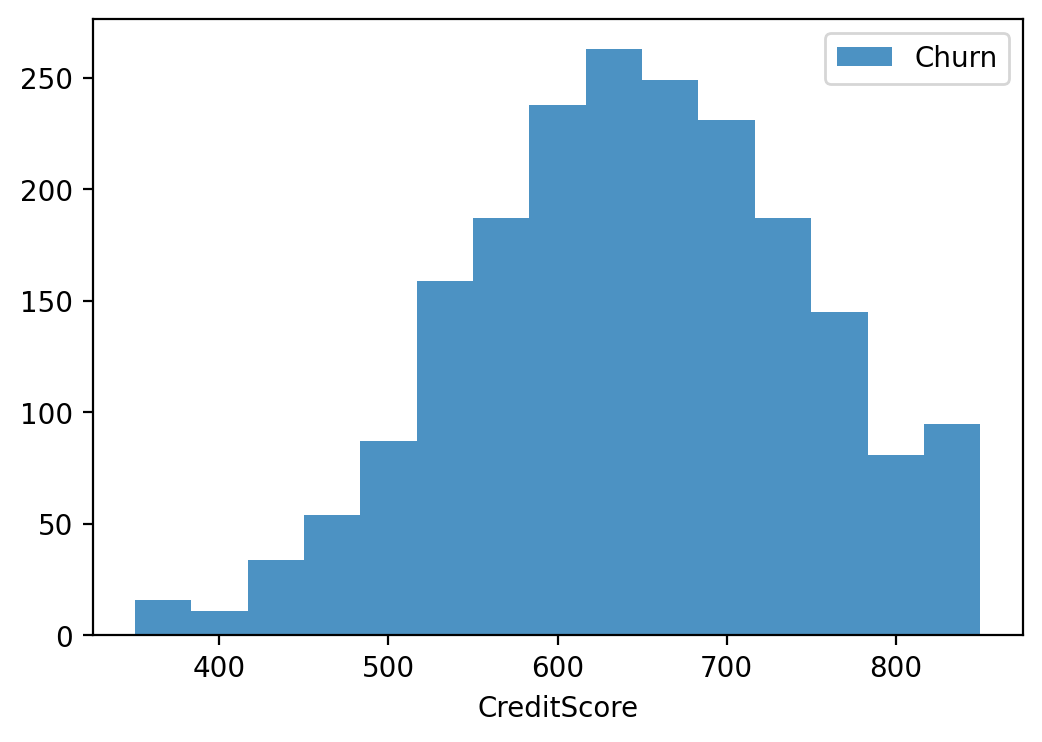

In [30]:
plt.figure(figsize=(6,4))
plt.xlabel('CreditScore')
plt.hist(churn["CreditScore"],bins=15, alpha=0.8, label='Churn')
plt.legend(loc='upper right')
plt.show()

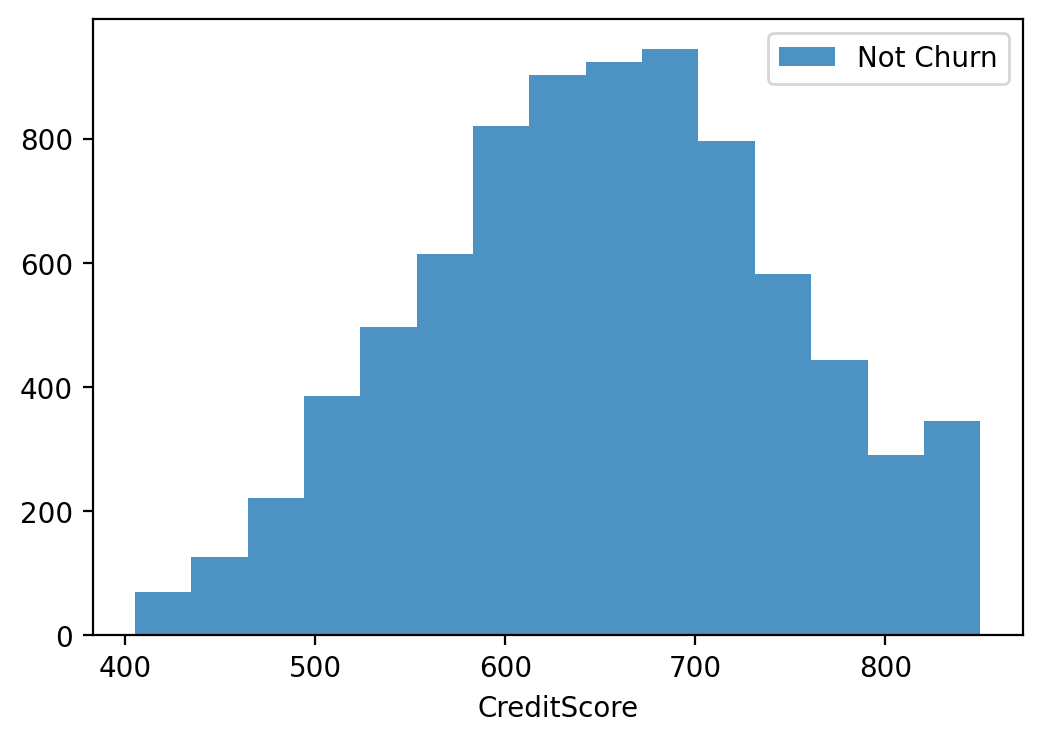

In [31]:
plt.figure(figsize=(6,4))
plt.xlabel('CreditScore')
plt.hist(not_churn["CreditScore"],bins=15, alpha=0.8, label='Not Churn')
plt.legend(loc='upper right')
plt.show()

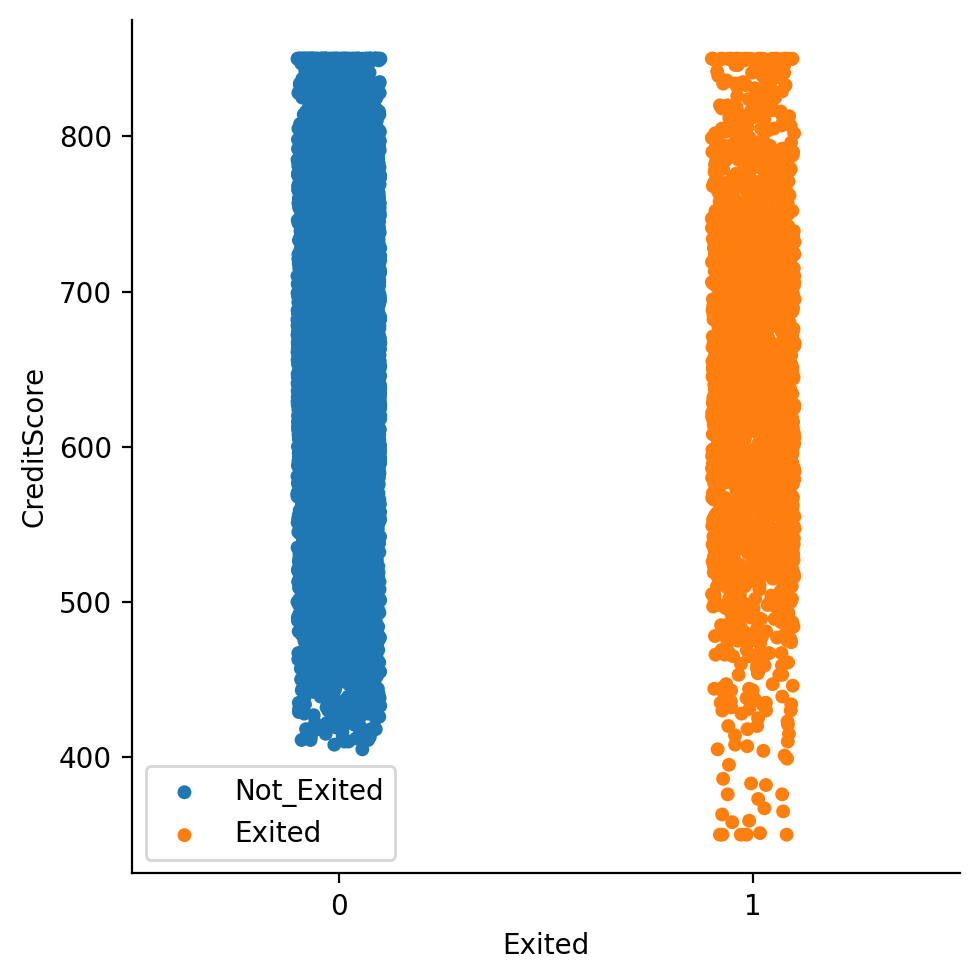

In [32]:
sns.catplot( y="CreditScore",x="Exited", hue='Exited' , data = df)
legend = plt.legend(["Not_Exited",'Exited'])

<h3> Age

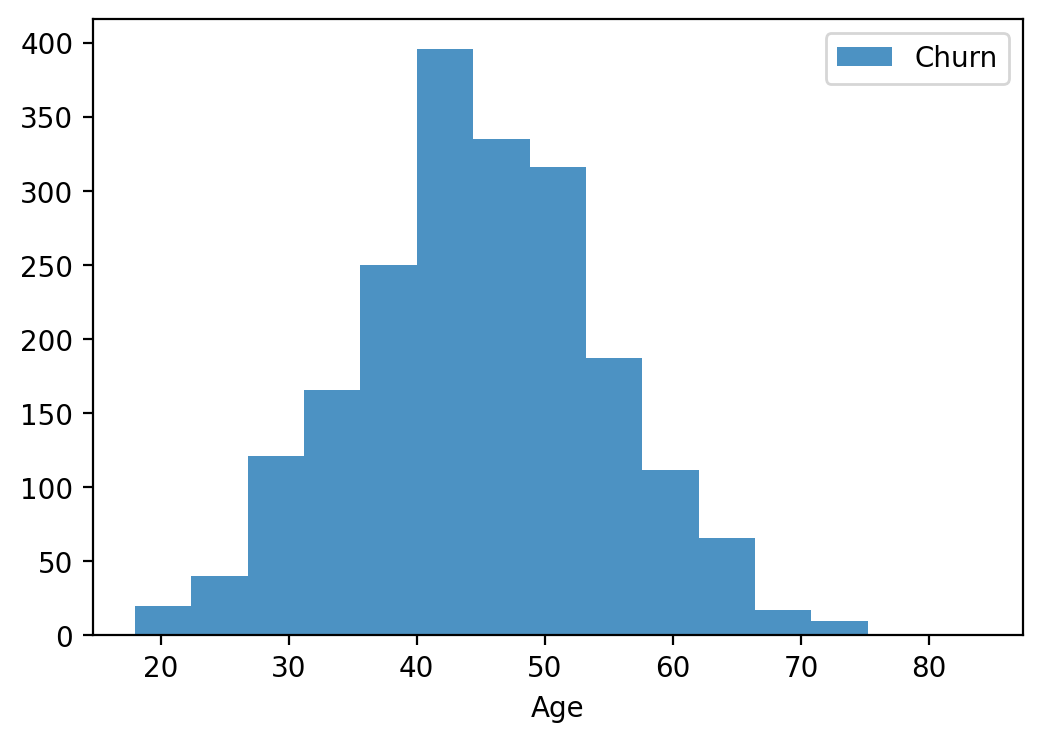

In [33]:
plt.figure(figsize=(6,4))
plt.xlabel('Age')
plt.hist(churn["Age"],bins=15, alpha=0.8, label='Churn')
plt.legend(loc='upper right')
plt.show()

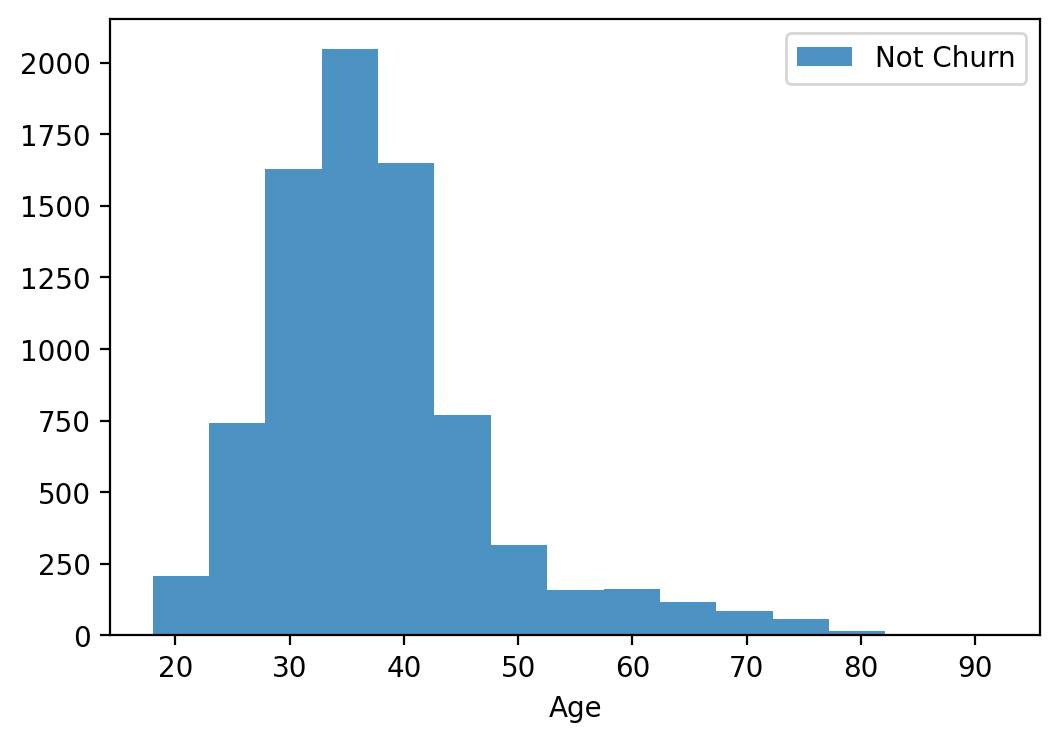

In [34]:
plt.figure(figsize=(6,4))
plt.xlabel('Age')
plt.hist(not_churn["Age"],bins=15, alpha=0.8, label='Not Churn')
plt.legend(loc='upper right')
plt.show()

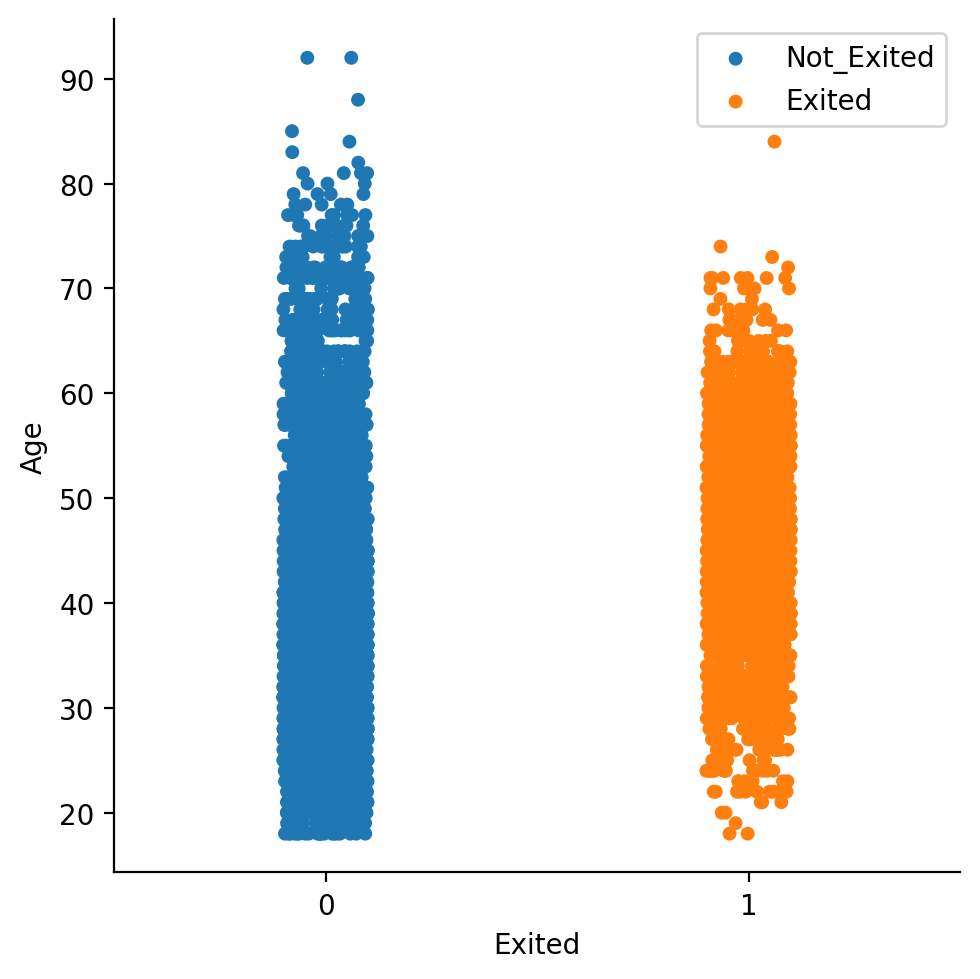

In [35]:
sns.catplot( y="Age",x="Exited", hue='Exited' , data = df)
legend = plt.legend(["Not_Exited",'Exited'])

<h3>Estimated Salary

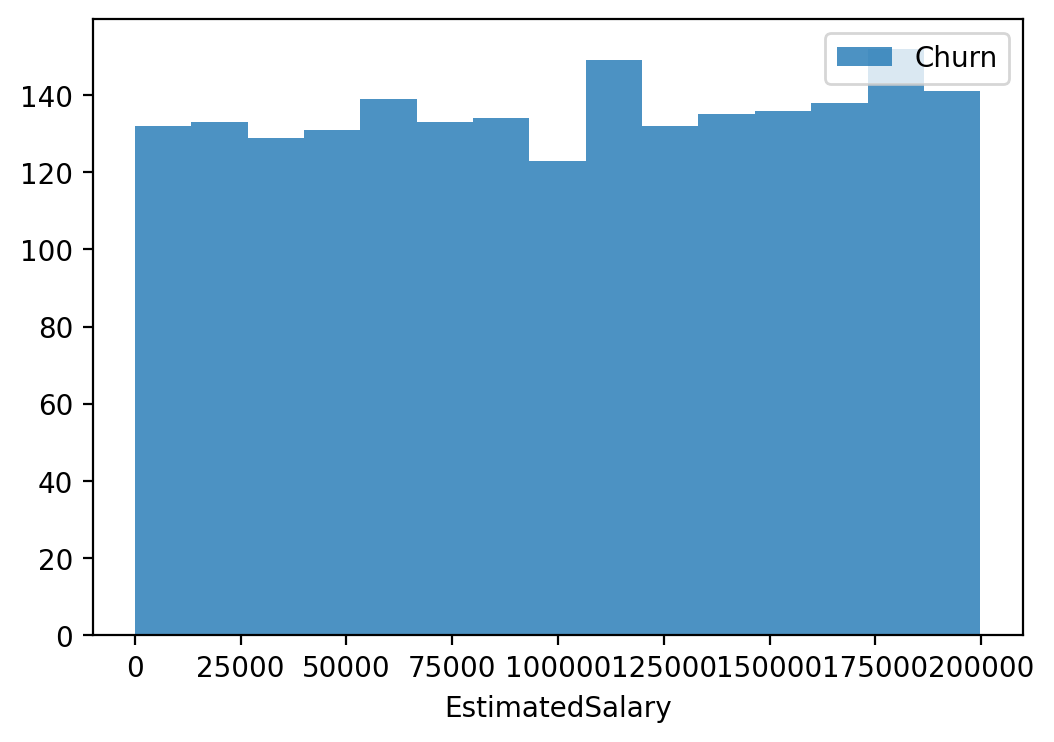

In [36]:
plt.figure(figsize=(6,4))
plt.xlabel('EstimatedSalary')
plt.hist(churn["EstimatedSalary"],bins=15, alpha=0.8, label='Churn')
plt.legend(loc='upper right')
plt.show()

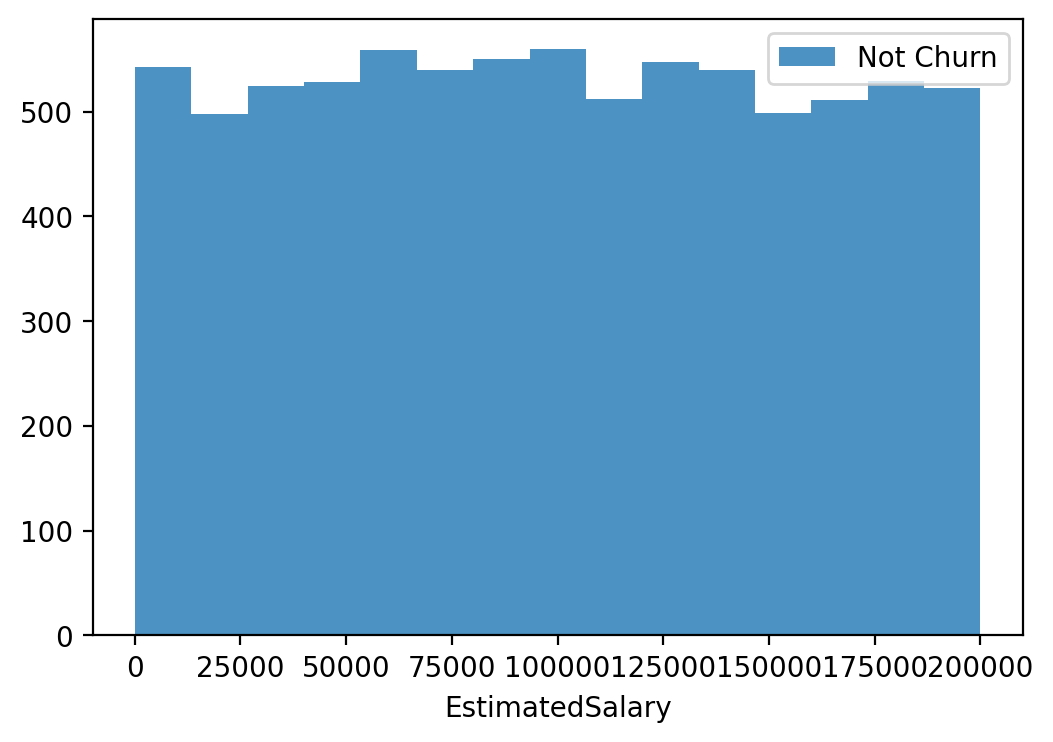

In [37]:
plt.figure(figsize=(6,4))
plt.xlabel('EstimatedSalary')
plt.hist(not_churn["EstimatedSalary"],bins=15, alpha=0.8, label='Not Churn')
plt.legend(loc='upper right')
plt.show()

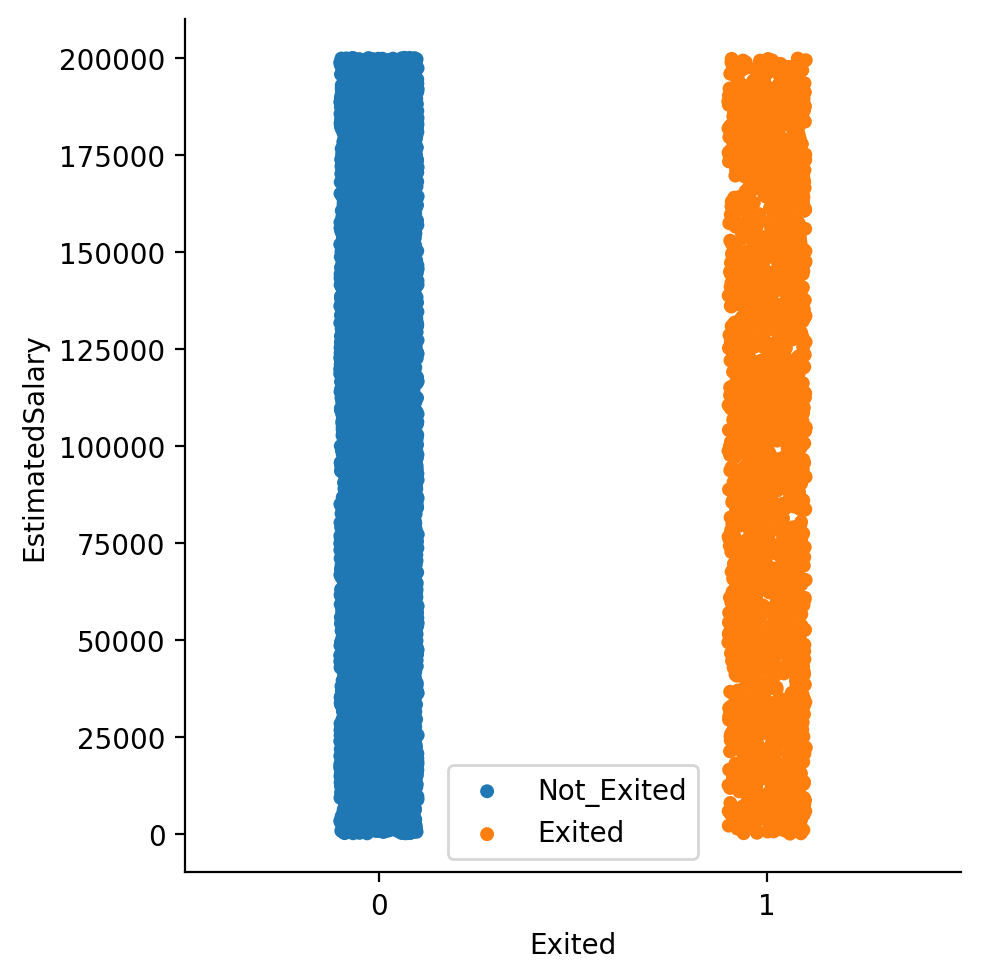

In [38]:
sns.catplot( y="EstimatedSalary",x="Exited", hue='Exited' , data = df)
legend = plt.legend(["Not_Exited",'Exited'])

<h3>Balance


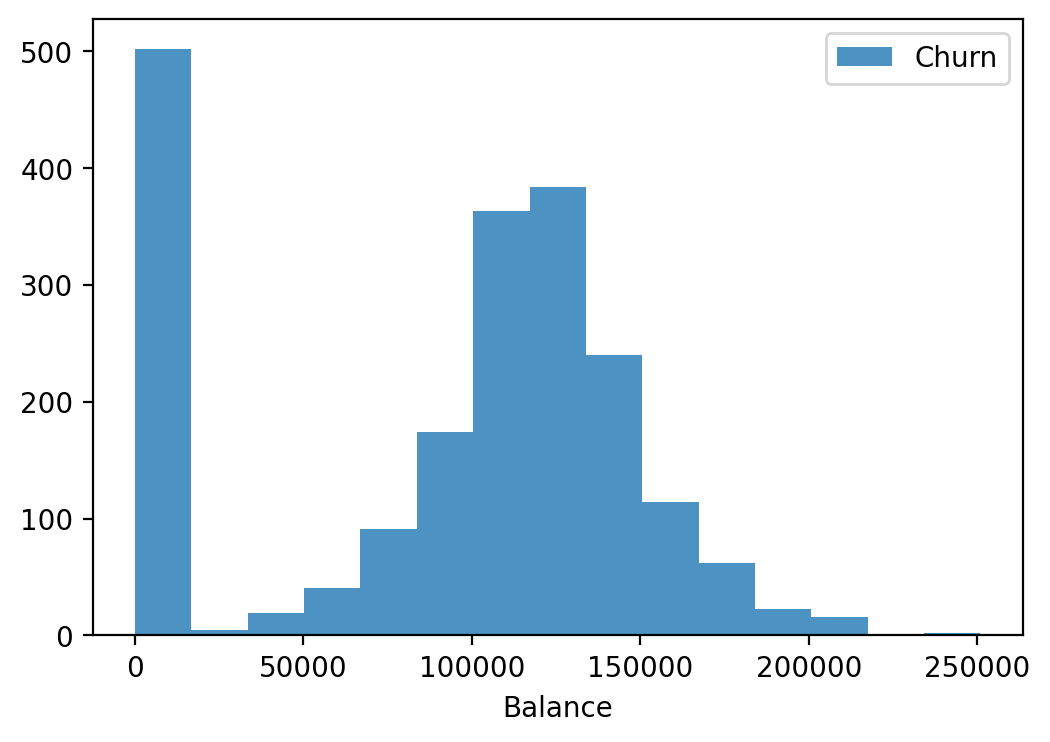

In [39]:
plt.figure(figsize=(6,4))
plt.xlabel('Balance')
plt.hist(churn["Balance"],bins=15, alpha=0.8, label='Churn')
plt.legend(loc='upper right')
plt.show()

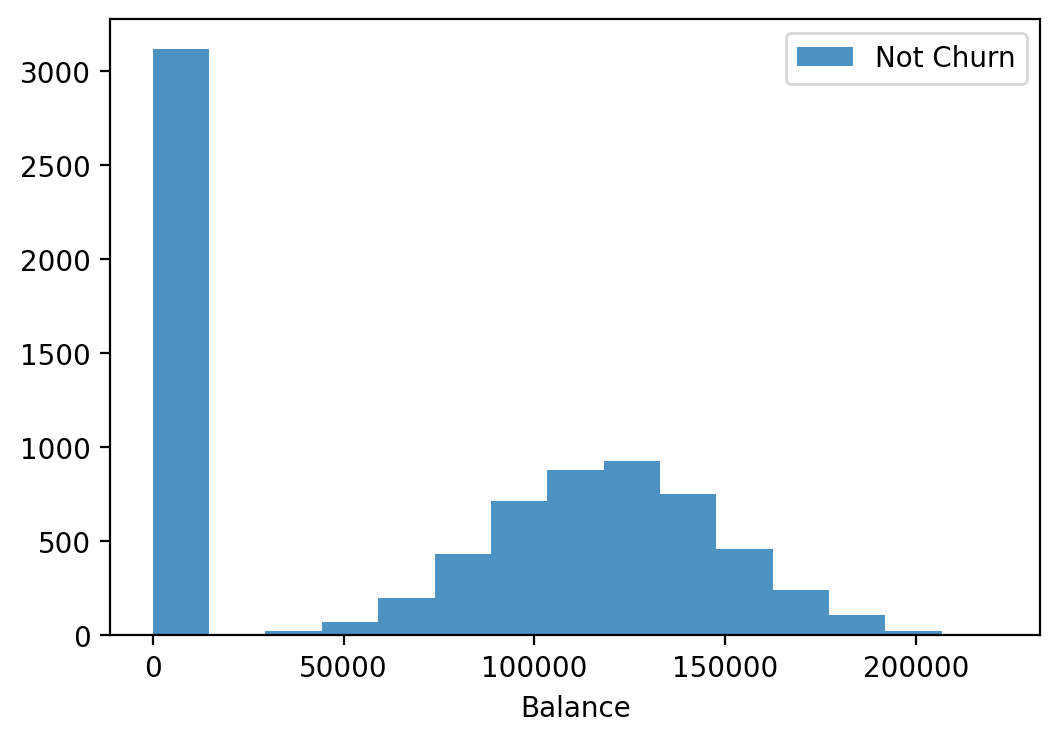

In [40]:
plt.figure(figsize=(6,4))
plt.xlabel('Balance')
plt.hist(not_churn["Balance"],bins=15, alpha=0.8, label='Not Churn')
plt.legend(loc='upper right')
plt.show()

<Figure size 1400x1000 with 0 Axes>

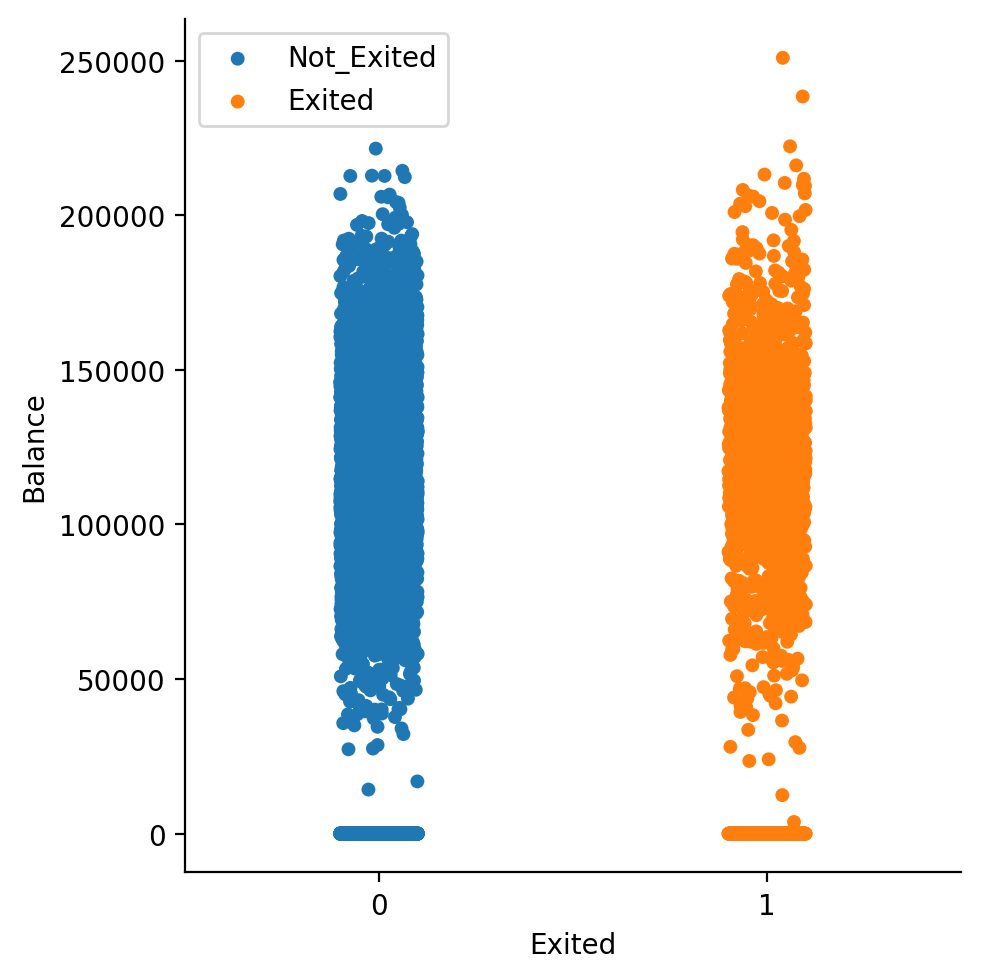

In [41]:
plt.figure(figsize=(14,10))
sns.catplot( y="Balance",x="Exited", hue='Exited' , data = df)
legend = plt.legend(["Not_Exited",'Exited'])

<h1> <b> Correlation Matrix

<Axes: >

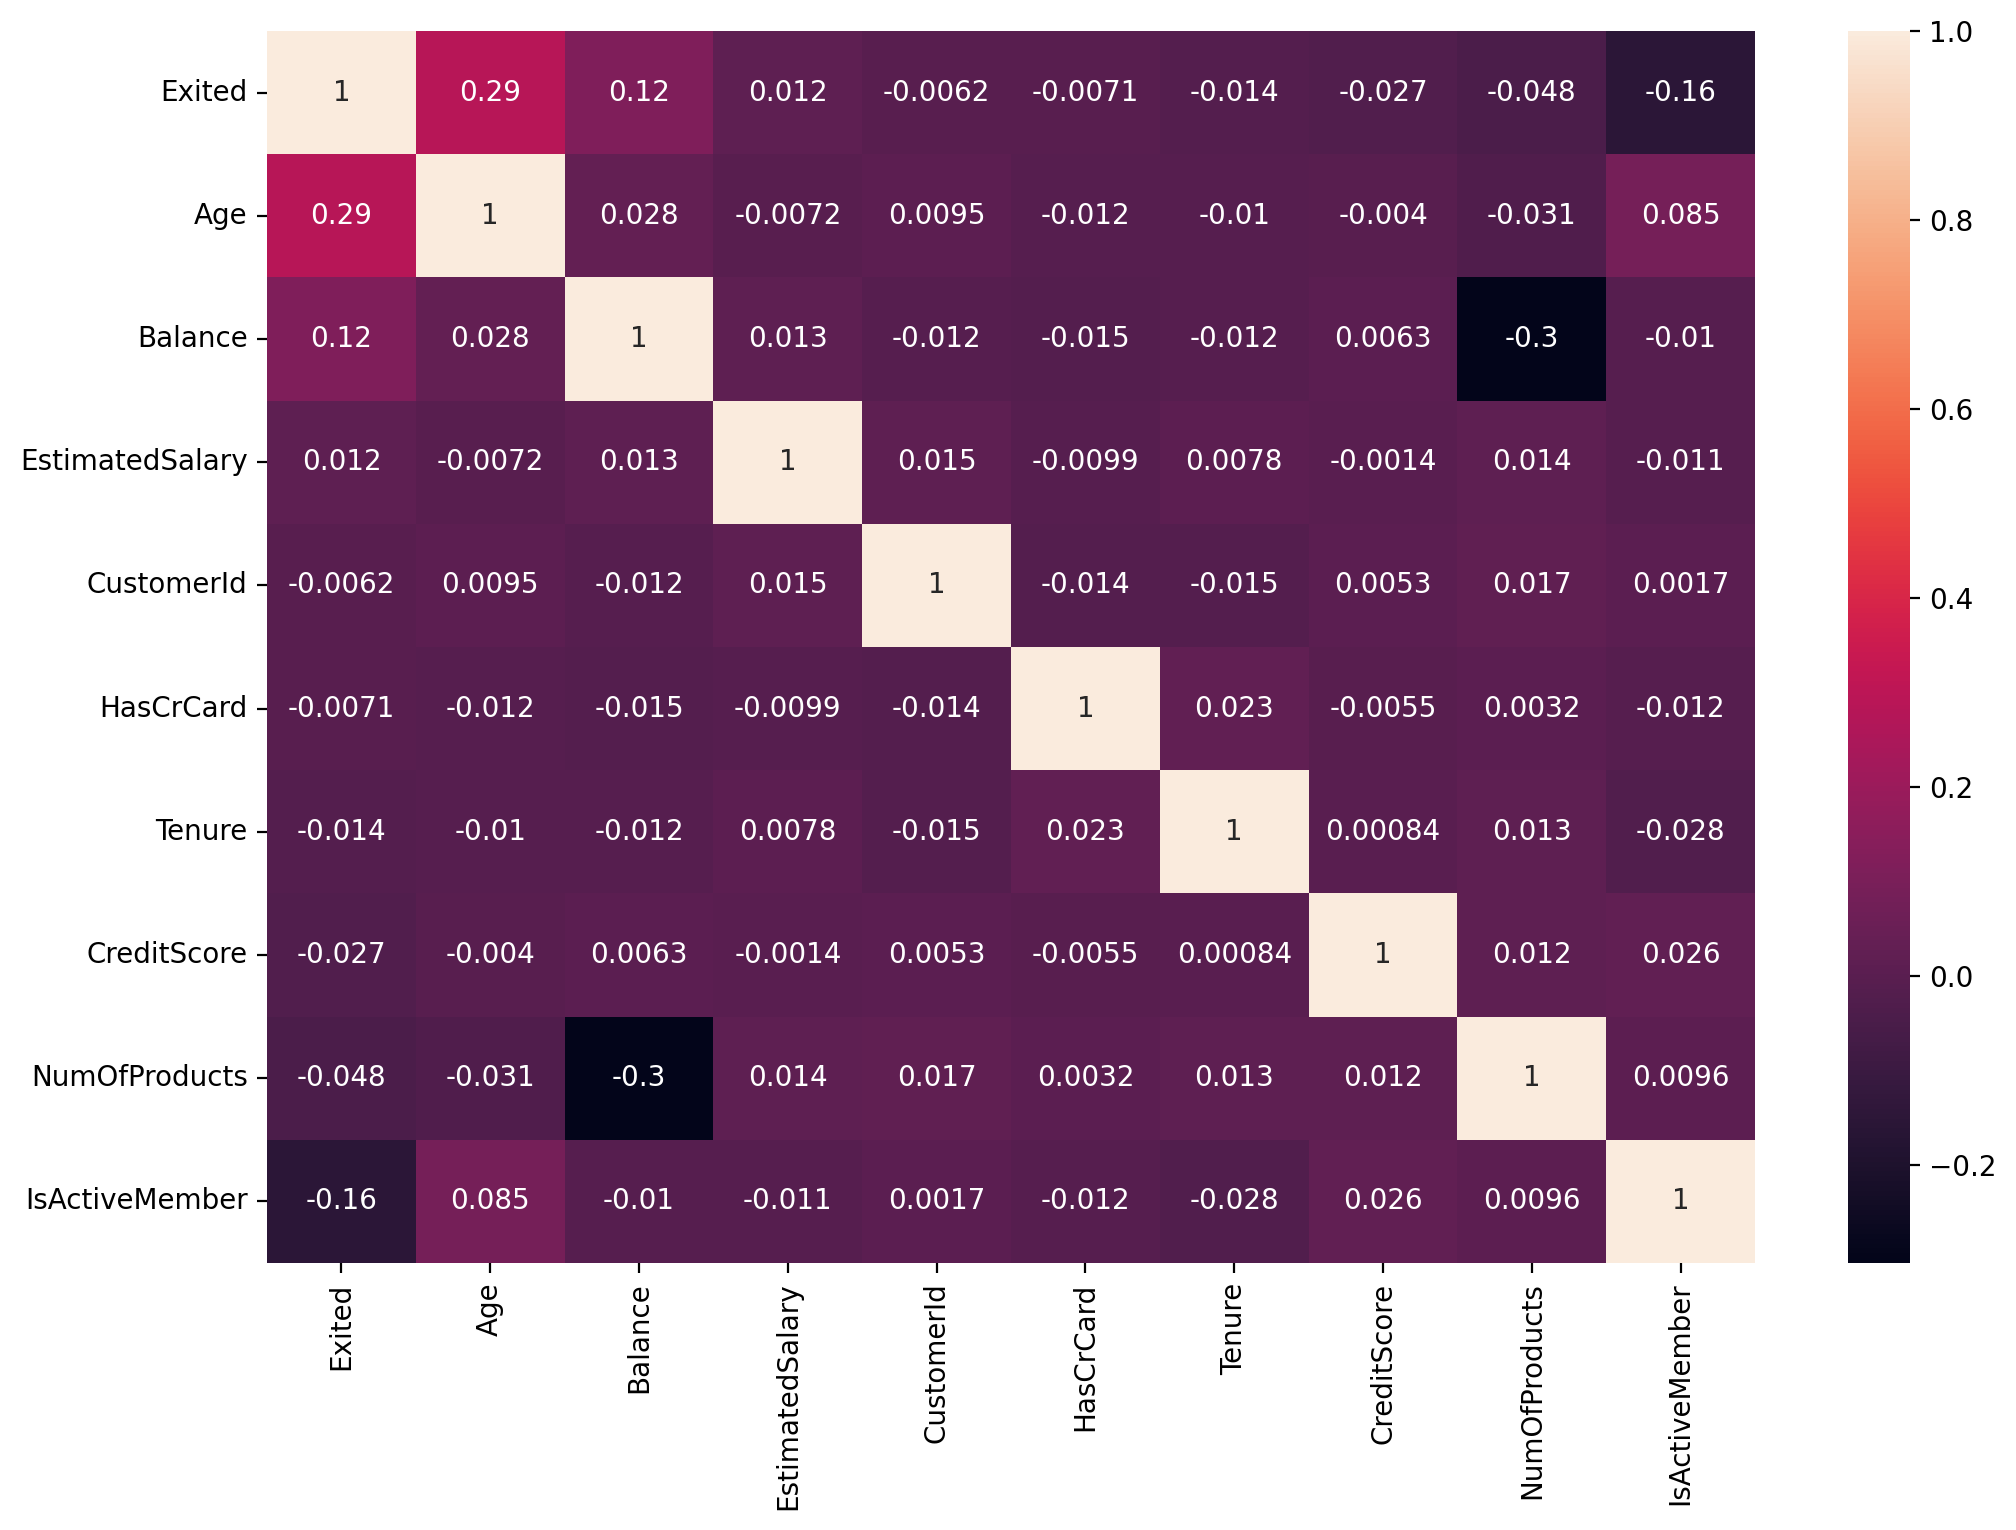

In [42]:
cols = df.corr().nlargest(10, 'Exited')['Exited'].index
cm = df[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True,)

In [43]:
df['Balance'].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
5%            0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
90%      149244.792000
95%      162711.669000
99%      185967.985400
max      250898.090000
Name: Balance, dtype: float64

<h1><b> Outliers

In [44]:
numeric_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [45]:
import plotly.express as px
px.box(df, y = 'Age')

# sns.catplot(y='Age', kind='box',data = df)

In [46]:
px.box(df, y='CreditScore')

In [47]:
px.box(df, y='Balance')

In [48]:
px.box(df, y='EstimatedSalary')

In [49]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [50]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [51]:
# There is no outlier
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

CreditScore has  None Outliers
Age has  None Outliers
Balance has  None Outliers
EstimatedSalary has  None Outliers


<h1> Feature engineering

In [52]:
# we standardize tenure with age
df["NewTenure"] = df["Tenure"]/df["Age"]
df["NewCreditsScore"] = pd.qcut(df['CreditScore'], 6, labels = [1, 2, 3, 4, 5, 6])
df["NewAgeScore"] = pd.qcut(df['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df["NewBalanceScore"] = pd.qcut(df['Balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
df["NewEstSalaryScore"] = pd.qcut(df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [53]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore
RowNumber,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4


<h1> One Hot Encoding

In [54]:
# Variables to apply one hot encoding
list = ["Gender", "Geography"]
df = pd.get_dummies(df, columns =list, drop_first = True)


In [55]:
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6,0,0,0
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6,0,0,1
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6,0,0,0
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5,0,0,0
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4,0,0,1


<h1> Scalling

In [56]:
# Removing variables that will not affect the dependent variable
df = df.drop(["CustomerId","Surname"], axis = 1)

In [57]:
# Scale features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [58]:
new_cols_ohe = ["Gender_Male","Geography_Germany","Geography_Spain"]
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) <= 10]
cols_need_scale = [col for col in df.columns if col not in new_cols_ohe
                   and col not in "Exited"
                   and col not in like_num]

for col in cols_need_scale:
    df[col] = robust_scaler(df[col])

In [59]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,,,,
1,-0.246,0.417,-0.75,-0.761,1,1,1,0.012,1,-0.217,3,6,1,6,0,0,0
2,-0.328,0.333,-1.00,-0.105,1,0,1,0.126,0,-0.279,2,6,3,6,0,0,1
3,-1.119,0.417,0.75,0.489,3,1,0,0.140,1,0.164,1,6,5,6,0,0,0
4,0.351,0.167,-1.00,-0.761,2,0,0,-0.065,0,-0.276,5,5,1,5,0,0,0
5,1.478,0.500,-0.75,0.222,1,1,1,-0.215,0,-0.220,6,6,4,4,0,0,1


<h1><b>Modeling


In [60]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.8 MB/s eta 0:00:00


In [61]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

In [62]:
X = df.drop("Exited",axis=1)
y = df["Exited"]
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)
# Models for Classification
models = [('LR', LogisticRegression(random_state=123456)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=123456)),
          ('RF', RandomForestClassifier(random_state=123456)),
          ('SVR', SVC(gamma='auto',random_state=123456)),
          ('GB', GradientBoostingClassifier(random_state = 12345)),
          ("LightGBM", LGBMClassifier(random_state=123456))]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=123456, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.825500 (0.008812)
KNN: 0.820900 (0.009648)
CART: 0.790600 (0.011047)
RF: 0.861900 (0.008324)
SVR: 0.845200 (0.008195)
GB: 0.865000 (0.008426)
LightGBM: 0.862900 (0.008455)


In [63]:
  # GB Confusion Matrix
model_GB = GradientBoostingClassifier(random_state=12345)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[1520,  230],
       [  53,  197]])

In [64]:
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])

True Positive :  197
True Negative :  1520
False Positive:  230
False Negative:  53


In [65]:
# Classification Report for XGB Model

print(classification_report(model_GB.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1750
           1       0.46      0.79      0.58       250

    accuracy                           0.86      2000
   macro avg       0.71      0.83      0.75      2000
weighted avg       0.90      0.86      0.87      2000



In [66]:
# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

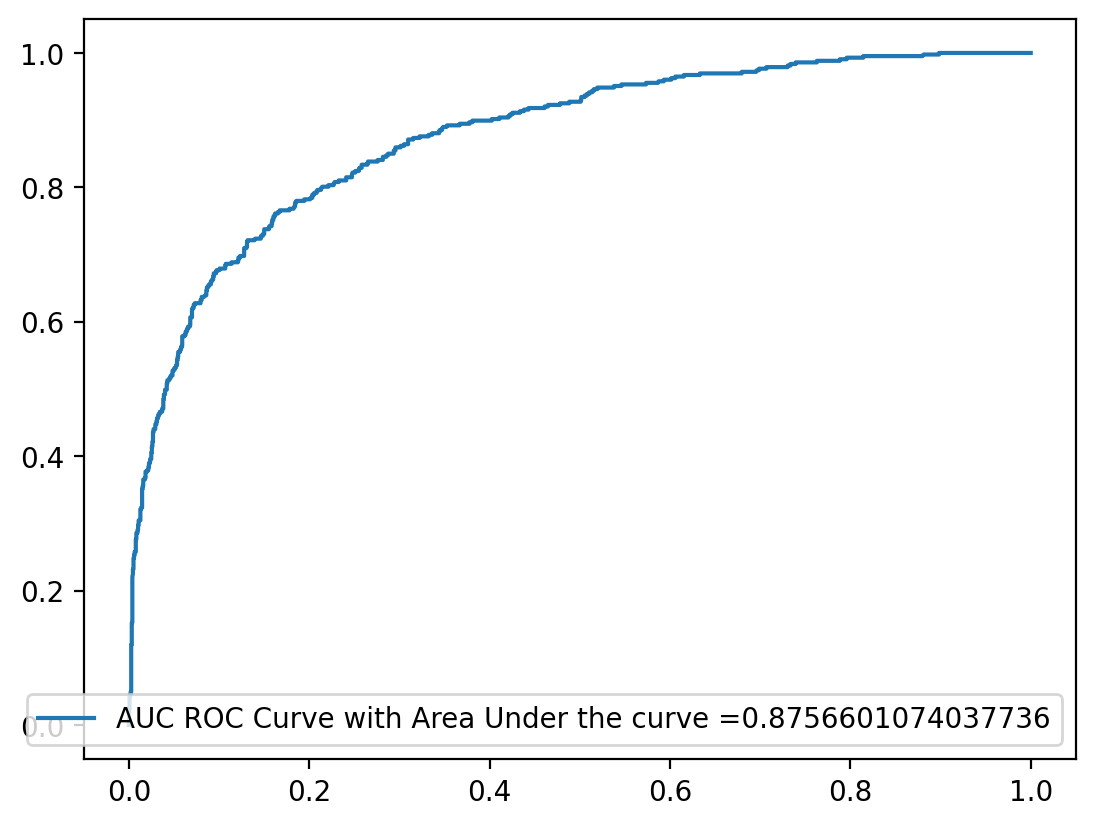

In [67]:
generate_auc_roc_curve(model_GB, X_test)